# Mining Twitter

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://developer.twitter.com/en/apps and create a sample application. It is possible that Twitter no longer supports sandboxed applications and you may need to submit a request for permission to develop an app on Twitter.

There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="resources/ch01-twitter/images/Twitter-AppCredentials.png" width="600px">

If you are running this code on Binder or from the Docker container, you should just be able to execute the code in this notebook without any worries whatsoever about installing dependencies. If you are running the code from your own development envioronment, however, be advised that these examples in this chapter take advantage of a Python package called [twitter](https://github.com/sixohsix/twitter) to make API calls. You can install this package in a terminal with [pip](https://pypi.python.org/pypi/pip) with the command `pip install twitter`, preferably from within a [Python virtual environment](https://pypi.python.org/pypi/virtualenv). 

Once installed, you should be able to open up a Python interpreter (or better yet, your [IPython](http://ipython.org/) interpreter) and get rolling.

## Authorizing an application to access Twitter account data

In [24]:
import twitter
import os
from dotenv import load_dotenv

load_dotenv()

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")
OAUTH_TOKEN = os.getenv("ACCESS_TOKEN")
OAUTH_TOKEN_SECRET = os.getenv("ACCESS_TOKEN_SECRET")

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Retrieving trends

In [25]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': 'jade picon', 'url': 'http://twitter.com/search?q=%22jade+picon%22', 'promoted_content': None, 'query': '%22jade+picon%22', 'tweet_volume': 32325}, {'name': '#velatobkk', 'url': 'http://twitter.com/search?q=%23velatobkk', 'promoted_content': None, 'query': '%23velatobkk', 'tweet_volume': 78696}, {'name': 'Neymar', 'url': 'http://twitter.com/search?q=Neymar', 'promoted_content': None, 'query': 'Neymar', 'tweet_volume': 85931}, {'name': '#TENLEE_10MPaintMeNaked', 'url': 'http://twitter.com/search?q=%23TENLEE_10MPaintMeNaked', 'promoted_content': None, 'query': '%23TENLEE_10MPaintMeNaked', 'tweet_volume': 56629}, {'name': '#ZETAWIN2021', 'url': 'http://twitter.com/search?q=%23ZETAWIN2021', 'promoted_content': None, 'query': '%23ZETAWIN2021', 'tweet_volume': None}, {'name': 'João Guilherme', 'url': 'http://twitter.com/search?q=%22Jo%C3%A3o+Guilherme%22', 'promoted_content': None, 'query': '%22Jo%C3%A3o+Guilherme%22', 'tweet_volume': 26691}, {'name': 'TwiteraaGt Açıldı

In [26]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

jade picon
#velatobkk
Neymar
#TENLEE_10MPaintMeNaked
#ZETAWIN2021
João Guilherme
TwiteraaGt Açıldı
TEN OUT OF TEN
#ウマ娘で性格診断
ポケカの拡張パック
ウマ娘のキャラ
大塚明夫さん
大塚さん
#AnonymousBrof
古戦場欠席
野外音楽イベントの客
酒類提供
全国最多感染
小林さん
angie
椎名林檎
Brasília
ルパン三世
Xbox 360
まがりなり
CBCテレビ
Brendan
小林清志さん
MOONBIN X NEIKIDNIS COLLECTION
Sakkari
Andreescu
プリンニシテヤルノ
菅首相の退陣巡り発言
麻生財務相
次元大介
Icardi
ムンナイ
bozo
Pieper
Xbox One
Requesting Bazinga
次元の声
Ole Miss
Mac Miller
Esplanada
1 Day
麺オタク
チャンスー
Allan Rodríguez
元AKBラーメン店主


In [27]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

#BachelorInParadise
Brendan
Xbox 360
#billiejoin
Xbox One
Ole Miss
Mac Miller
Louisville
Sakkari
Wii U
Natasha
#TaxTheChurches
Blade
#WWERaw
Sega Genesis
George Washington
Andreescu
#Sep7Coup
karl
Junie B Jones
Michael K. Williams
The Wire
Robert E. Lee
Omar
Gameboy Color
Atari 2600
Nintendo Switch
GameCube
Scott Baio
Matt Corral
Nintendo DS
snoop conner
Xbox Series X
taemin
Super Nintendo
Satterfield
Brooksby
PlayStation 2
Franklin Graham
DS Lite
DeJoy
Trey Mancini
PS4 Pro
Omos
Djokovic
Nintendo Wii
Talia
Hyunjin
SNES
mr. davis


In [28]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Xbox 360', 'Andreescu', 'Mac Miller', 'Brendan', 'Xbox One', 'Ole Miss', 'Sakkari'}


## Anatomy of a Tweet

In [29]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#MothersDay' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Tue Sep 07 06:13:46 +0000 2021",
 "id": 1435124113174007811,
 "id_str": "1435124113174007811",
 "text": "RT @Forest_Draw: Some game Moms for this #MothersDay \n\n#Rosalina #SuperMario #SuperMarioGalaxy #SuperMarioGalaxy2 #MsPacMan #Pacman #Melony\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "MothersDay",
    "indices": [
     41,
     52
    ]
   },
   {
    "text": "Rosalina",
    "indices": [
     55,
     64
    ]
   },
   {
    "text": "SuperMario",
    "indices": [
     65,
     76
    ]
   },
   {
    "text": "SuperMarioGalaxy",
    "indices": [
     77,
     94
    ]
   },
   {
    "text": "SuperMarioGalaxy2",
    "indices": [
     95,
     113
    ]
   },
   {
    "text": "MsPacMan",
    "indices": [
     114,
     123
    ]
   },
   {
    "text": "Pacman",
    "indices": [
     124,
     131
    ]
   },
   {
    "t

In [30]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @Forest_Draw: Some game Moms for this #MothersDay 

#Rosalina #SuperMario #SuperMarioGalaxy #SuperMarioGalaxy2 #MsPacMan #Pacman #Melony…
Favorites:  0
Retweets:  56

RT @I_Love_Shilpa: #मातृदिन 🙏
We celebrate #MothersDay on Shravan Amavas. This year it's on Monday 6th Sept.
Some people think that it's ju…
Favorites:  0
Retweets:  12

RT @PRMeena_IAS: #मां का कोई दिन नहीं होता बल्कि #मां से ही दिन होता है। #मातृदिवस की हार्दिक शुभकामनाएं💐💐
#happymothersday2021 #MothersDay…
Favorites:  0
Retweets:  23

#engineering #engineer #technology #didyouknow #facts #calls #mothersday #mothers #science #engineers… https://t.co/ClF0tP3hjo
Favorites:  0
Retweets:  0

mothers day gifts from bump | good cheap gifts for mothers day #MothersDay #MothersDay2021 #mugs #mugs… https://t.co/m8FU8STyia
Favorites:  0
Retweets:  0

Vintage Kitsch Kissing Fish Shakers https://t.co/JcMHN1Kv4W #white #housewarming #mothersday #brown #midcentury… https://t.co/KhZ6YUdFh3
Favorites:  0
Retweets:  0

RT @ArorajArv

## Extracting text, screen names, and hashtags from tweets

In [31]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @Forest_Draw: Some game Moms for this #MothersDay \n\n#Rosalina #SuperMario #SuperMarioGalaxy #SuperMarioGalaxy2 #MsPacMan #Pacman #Melony\u2026",
 "RT @I_Love_Shilpa: #\u092e\u093e\u0924\u0943\u0926\u093f\u0928 \ud83d\ude4f\nWe celebrate #MothersDay on Shravan Amavas. This year it's on Monday 6th Sept.\nSome people think that it's ju\u2026",
 "RT @PRMeena_IAS: #\u092e\u093e\u0902 \u0915\u093e \u0915\u094b\u0908 \u0926\u093f\u0928 \u0928\u0939\u0940\u0902 \u0939\u094b\u0924\u093e \u092c\u0932\u094d\u0915\u093f #\u092e\u093e\u0902 \u0938\u0947 \u0939\u0940 \u0926\u093f\u0928 \u0939\u094b\u0924\u093e \u0939\u0948\u0964 #\u092e\u093e\u0924\u0943\u0926\u093f\u0935\u0938 \u0915\u0940 \u0939\u093e\u0930\u094d\u0926\u093f\u0915 \u0936\u0941\u092d\u0915\u093e\u092e\u0928\u093e\u090f\u0902\ud83d\udc90\ud83d\udc90\n#happymothersday2021 #MothersDay\u2026",
 "#engineering #engineer #technology #didyouknow #facts #calls #mothersday #mothers #science #engineers\u2026 https://t.co/ClF0tP3hjo",

## Creating a basic frequency distribution from the words in tweets

In [32]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 213), ('the', 195), ('to', 182), ('.', 147), ('#MothersDay', 122), ('day', 117), ('for', 116), ('#teachersday', 101), ('#mothersday', 98), ('Happy', 96)]

[('ArorajArvind', 12), ('men_are_human', 12), ('I_Love_Shilpa', 11), ('TrasElValle_OBC', 10), ('jjaranaz94', 8), ('thriftyfifty6', 7), ('Etsy', 7), ('renaissancefai', 6), ('creatorzRT', 6), ('DAndalora_Bella', 5)]

[('MothersDay', 130), ('mothersday', 112), ('teachersday', 111), ('teacher', 99), ('teachers', 84), ('happyteachersday', 65), ('mugs', 58), ('MothersDay2021', 57), ('teachersofinstagram', 53), ('vintage', 46)]



## Using prettytable to display tuples in a nice tabular format

In [33]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------------+-------+
| Word         | Count |
+--------------+-------+
| RT           |   213 |
| the          |   195 |
| to           |   182 |
| .            |   147 |
| #MothersDay  |   122 |
| day          |   117 |
| for          |   116 |
| #teachersday |   101 |
| #mothersday  |    98 |
| Happy        |    96 |
+--------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| ArorajArvind    |    12 |
| men_are_human   |    12 |
| I_Love_Shilpa   |    11 |
| TrasElValle_OBC |    10 |
| jjaranaz94      |     8 |
| thriftyfifty6   |     7 |
| Etsy            |     7 |
| renaissancefai  |     6 |
| creatorzRT      |     6 |
| DAndalora_Bella |     5 |
+-----------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| MothersDay          |   130 |
| mothersday          |   112 |
| teachersday         |   111 |
| teacher             |    99 |
| teachers            |    84 |
| 

## Calculating lexical diversity for tweets

In [34]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3299768401973618
0.54
0.21353166986564298
16.551666666666666


## Finding the most popular retweets

In [35]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+----------------+---------------------+----------------------------------------------------+
| Count | Screen Name    | Tweet ID            | Text                                               |
+-------+----------------+---------------------+----------------------------------------------------+
| 13655 | blkgirlculture | 1259486190505426952 | RT @blkgirlculture: These Black mamas really said  |
|       |                |                     | Copy and paste                                     |
|       |                |                     |                                                    |
|       |                |                     | Happy #MothersDay 💫 https://t.co/fDgczno9hk       |
| 2739  | ohmthitiwat    | 1293548053811441664 | RT @ohmthitiwat: สุขสันต์วันแม่นะครับ                    |
|       |                |                     | ขอให้แม่มีสุขภาพแข็งแรง มีความสุขมากๆ                     |
|       |                |                     | โอห์มจะเป็นเด็กดี รัก

## Looking up users who have retweeted a status

In [36]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

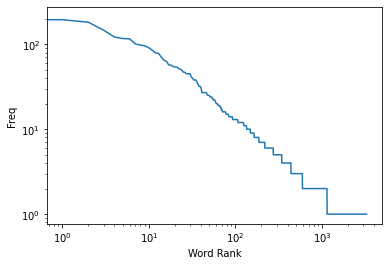

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

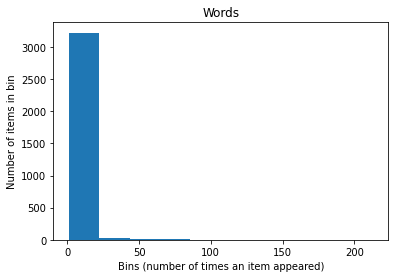

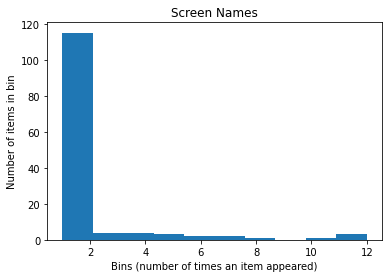

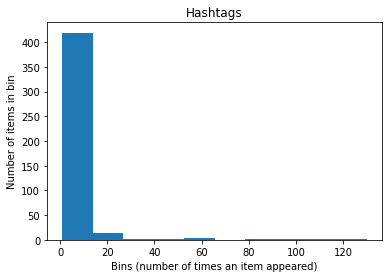

<Figure size 432x288 with 0 Axes>

In [38]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

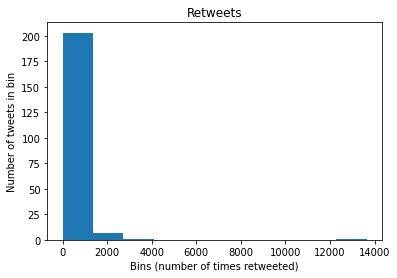

In [39]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

## Sentiment Analysis

In [40]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/shaneoh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [42]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [43]:
analyzer = SentimentIntensityAnalyzer()

In [44]:
analyzer.polarity_scores('Hello')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [45]:
analyzer.polarity_scores('I really enjoy this video series.')

{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5413}

In [46]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.64}

In [47]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.7271}

In [48]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.6627}

In [49]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [50]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [51]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.848 : "RT @Kavin_Karthik97: Happy Birthday @mammukka sir ❤️ have a blockbuster year ahead 😊 behalf wishes from @Kavin_m_0431 fans 🤗 

#HappyBirthd…"


In [52]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.773 : "RT @earringdealer1: The downfall of Nasty Gal is still so crazy to me bc to this day nobody has been able to provide what Sophia Amoruso br…"
